In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
marketing=pd.read_csv('https://raw.githubusercontent.com/rohailkhan/data/main/marketing.csv')
marketing.head(3)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True


In [3]:
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


### Percentage of Null values

In [4]:
null=marketing.isnull().sum()/marketing.isnull().count()*100

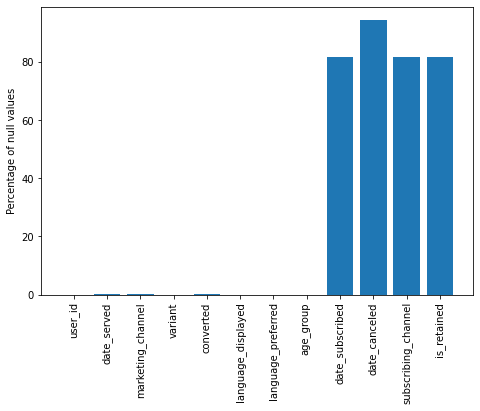

In [5]:
# find dataframe nulls count
data = null
# create figure
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
# set Y axis label
ax.set_ylabel('Percentage of null values')
# set orientation for X axis labels
plt.xticks(rotation='vertical')
# draw bar chart
ax.bar(marketing.columns, data)
plt.show()

### Pre-processing


1.   Change date columns to datetime using pd.to_datetime
2.   Change subscribing_channel to int



In [6]:
marketing.columns
for col in marketing: 
  if 'date' in col:
    marketing[col]=pd.to_datetime(marketing[col])

In [7]:
temp.strftime('%Y-%m-%d')

user_id                        object
date_served            datetime64[ns]
marketing_channel              object
variant                        object
converted                      object
language_displayed             object
language_preferred             object
age_group                      object
date_subscribed        datetime64[ns]
date_canceled          datetime64[ns]
subscribing_channel            object
is_retained                    object
dtype: object

In [8]:
marketing['subscribing_channel'].unique()

array(['House Ads', 'Email', 'Push', 'Facebook', 'Instagram', nan],
      dtype=object)

In [9]:
channel_codes={'House Ads':1, 'Email':2, 'Push':3, 'Facebook':4, 'Instagram':5}
# make a new column called channel code..and change
# all column values by mapping above dict
marketing['channel_code']=marketing['subscribing_channel'].map(channel_codes)

###  Its important to find users according to the day of the week.
### Making a new column showing the **Day of the week** for subscription *italicized text*

In [10]:
marketing['DoW']=marketing['date_subscribed'].dt.dayofweek
marketing[['DoW']].head(3)

,DoW
0,0.0
1,0.0
2,0.0


# **Question -1** Find unique visiters by day of the month

In [36]:
marketing['date_served_simple']=[ str(i)[8:10] for i in marketing['date_served']]

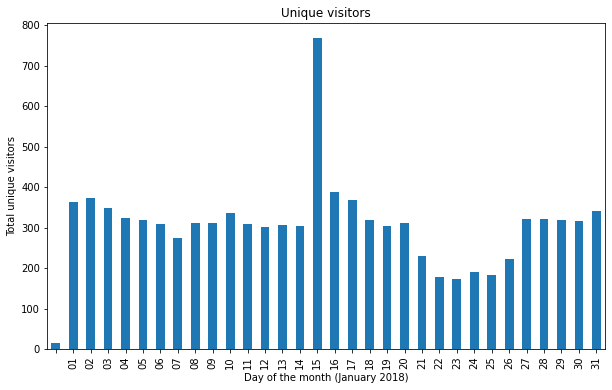

In [54]:
marketing.groupby('date_served_simple')['user_id'].nunique().plot(kind='bar', title='Unique visitors', ylabel='Total unique visitors',
         xlabel='Day of the month (January 2018)', figsize=(10, 6))
plt.show()

# **Question -1** Find unique visiters by day of the week

In [59]:
marketing.groupby(marketing['date_served'].dt.isocalendar().week)['user_id'].nunique()

week
1    2115
2    2042
3    2474
4    1512
5     952
Name: user_id, dtype: int64

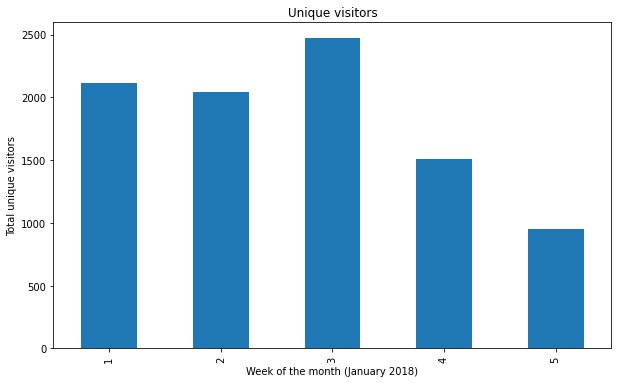

In [61]:
marketing.groupby(marketing['date_served'].dt.isocalendar().week)['user_id'].nunique().plot(kind='bar', title='Unique visitors', ylabel='Total unique visitors',
         xlabel='Week of the month (January 2018)', figsize=(10, 6))
plt.show()

##Conversion Rate and Retention Rate
### Conversion Rate
Shows the rate of success the compaign for bringing new subscribers 

**Conversion Rate =  Number of people who converted / total no of people we marketed**

In [70]:
converted=marketing[marketing['converted']==True]['user_id'].nunique()
total=marketing['user_id'].nunique()
conversion=converted/total
conversion_rate=round(conversion*100,2)
conversion_rate

13.89


### Retention Rate

**Retention Rate = Number of people who is retained / total no of people who converted**

In [69]:
total_converted=marketing[marketing['converted']==True]['user_id'].nunique()
retained=marketing[marketing['is_retained']==True]['user_id'].nunique()
Retention_Rate=round((retained/total_converted)*100,2)
Retention_Rate


66.8